# Supervised Learning: with Linear Regression as an Example

Supervised learning is a class of methods for modeling the relationship between:
* A dependent variable (**target**), and 

* One or more **feature** variables (**predictors**)

## Example: Medical cost prediction

Insurance companies need to predict the annual medical cost of a insurance policy holder.

* Target: **annual medical cost**
* Predictors: 
    * age, gender, bmi, number of children, smoker/non-smoke, region

Let us load the dataset.

In [1]:
import pandas as pd

med_cost = pd.read_csv('https://raw.githubusercontent.com/zhouy185/BUS_O712/refs/heads/main/Data/medical_costs.csv')
med_cost.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

We should overview the data, check for missing values and duplications, etc.

We aim at: 
1. predicting a policy holder's medical cost based on the individuals features.
2. evaluate the accuracy of the prediction.

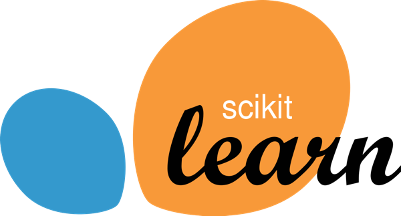</img> 


The main library to use is SciKit-Learn (`sklearn`).

* Included in Anaconda by default
* Use the command `!pip install scikit-learn` if the libar is not already installed



In [2]:
import sklearn

## Correlation between variables

Before our predictive analysis, let's examine the correlation between the variables.
* The command `df.corr()` calcuates the pairwise correlation coefficient between the variables
* We can further use 

In [7]:
correction_matrix=med_cost.corr(numeric_only=True)
correction_matrix

age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000

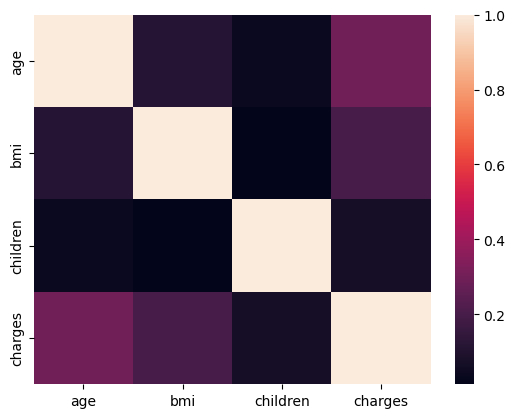

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correction_matrix)

plt.show()

## Supervised learning

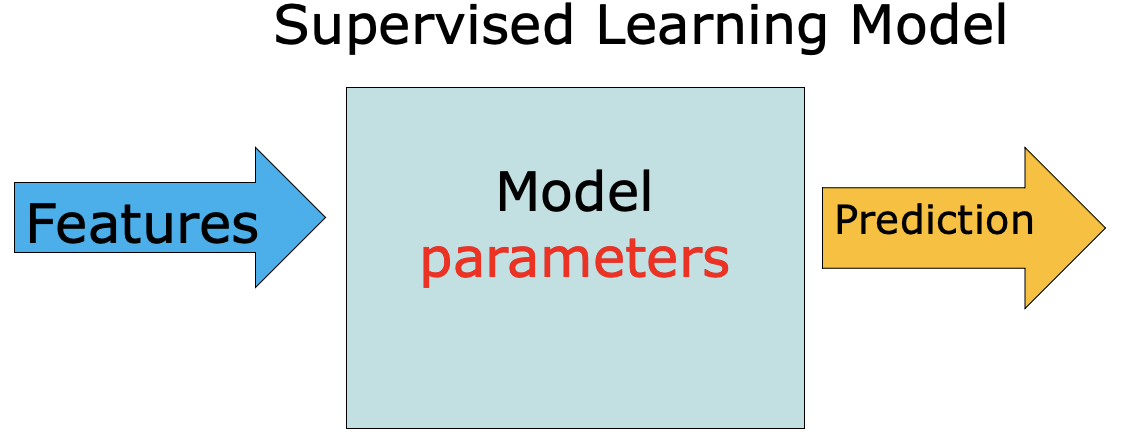</img>

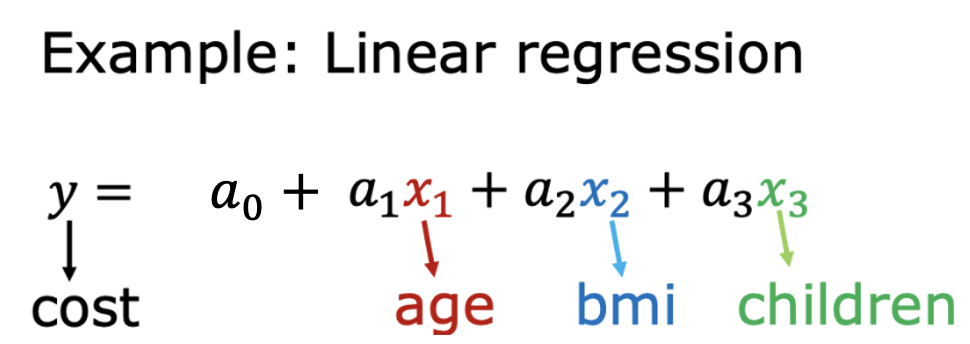</img>


Let's prepare the data for linear regression. We will start by including only the numeric columns.

In [14]:
y = med_cost['charges']
X = med_cost.drop('charges',axis=1)
X = X.select_dtypes(include=['number'])
X.head()



age     bmi  children
0   19  27.900         0
1   18  33.770         1
2   28  33.000         3
3   33  22.705         0
4   32  28.880         0

## Train-Test Split

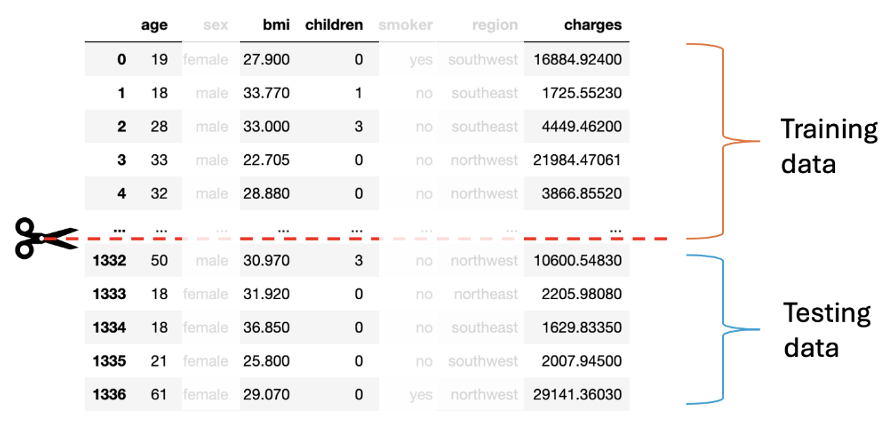</img>


* Training data is used to **fit** the model to data
* Testing data is used to evaluate the fit

We will use the `train_test_split()` method in `sklearn` to perform the split
* Use `test_size=` to specify the fraction of rows to use as the test data
* Use `random_state=` to specify a *random state* so that the results will be **reproducible**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_test.head()

age     bmi  children
899    49  22.515         0
1063   29  25.600         4
1255   51  36.385         3
298    31  34.390         3
237    31  38.390         2

## Model creation and training

We will:
1. Create a linear regression model using `LinearRegression()`  from the module `linear_model` in `sklearn`
2. Fit the model to the training data
3. View the model results
4. Use the model to make a prediction

First we create a linear regression model.

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Then, fit the model to the training data.

In [20]:
model.fit(X_train,y_train)

LinearRegression()

The model is now fitted to the data.

To view the fitted value of the parameters, we may use the attributes of the fitted model:

* `model.coef_` include the coefficient(s)
* `model.intercept_` is the intercept value

In [23]:
print(model.coef_)
print(model.intercept_)

[224.00207759 281.46287456 690.91749907]
-5095.383300664998


Recall that the linear regression model has the form $y=a_0+a_1x_1+a_2x_3+a_3x_3$.

In [26]:
a0 = model.intercept_
a1 = model.coef_[0]
a2 = model.coef_[1]
a3 = model.coef_[2]
print(f"The fitted model is y={a0:0.2f}+{a1:0.2f}x1+{a2:0.2f}x2+{a3:0.2f}x3")

The fitted model is y=-5095.38+224.00x1+281.46x2+690.92x3


We can now predict for a new data point (policy holder) using `model.predict()`
* Consider a new policy holder with:
    * age = 37
    * bmi = 27
    * children = 1
    * prediction: charges = ? 

It is idea that we construct a DataFrame for the new data point.

In [29]:
X_new = pd.DataFrame({'age':[37],'bmi':[27],'children':[1]})
X_new

model.predict(X_new)

array([11483.10868217])

## How to evaluate the performance of the model?

 Make use of the test data!
 
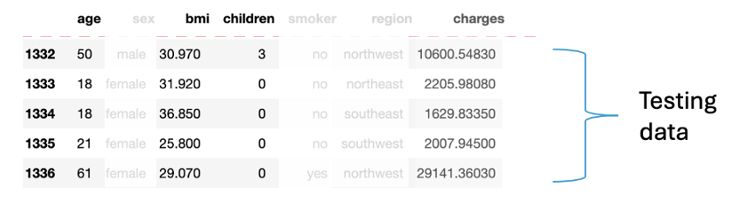

Measuring the prediction error or goodness-of-fit:
* Mean squared error - gap between predicton and observation
* $R^2$ (R-squared) - percentage of variance in the target variable explained by the model

We will:
* First predict on the test dataset, 
* Then use the `mean_squared_error` and `r2_score` in the `metrics` module of `sklearn` to calculate those metrics.

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [35]:
# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and the root MSE
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)

# Calculate R-squared
r2 = r2_score(y_test,y_pred)

print(rmse,r2)

12589.409964694138 0.13748020188497823


## How can you include the categorical varaibles?

Let's look at the `region` column. 

We can verify that there are four categories.

In [37]:
med_cost.head()
med_cost['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### One-hot encoding
* Convert the question "What is the region?" into four questions.
    * Is it southwest? Is it southeast? Is it northwest? Is it northeast?

  |region_southwest|region_southeast|region_northwest|region_northeast|
  |----------------|----------------|----------------|----------------|
  |  1             |   0            |   0            |    0           |
  |  0             |   1            |   0            |    0           |
  
But we can further remove one of those columns. Why?

To implement one-hot encoding, we may use the function `pd.get_dummies()` on the DataFrame

In [41]:
med_cost_encoded = pd.get_dummies(med_cost,drop_first=True,dtype=int)
med_cost_encoded.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

Now we can create a linear regression on all varaibles.

In [47]:
# Get the features and the target
y = med_cost_encoded['charges']
X = med_cost_encoded.drop('charges',axis=1)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create and fit the model
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

# Predict on the test data
y_pred = model_1.predict(X_test)

# Calculate MSE and R squared
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print(rmse,r2)

5956.342894363585 0.8069287081198013


We can view the model coefficients to see how the features affect the outcome

In [50]:
pd.DataFrame([model_1.coef_],columns=X.columns)

age         bmi    children    sex_male    smoker_yes  \
0  248.21072  318.701441  533.009989 -101.542054  23077.764593   

   region_northwest  region_southeast  region_southwest  
0       -391.761455       -838.919616       -659.139752

What insights can we get?

In [54]:
med_cost['bmi_squared'] = med_cost['bmi']**2
med_cost['bmi-children'] = med_cost['bmi']*med_cost['children']
med_cost.head()

age     sex     bmi  children smoker     region      charges  bmi_squared  \
0   19  female  27.900         0    yes  southwest  16884.92400   778.410000   
1   18    male  33.770         1     no  southeast   1725.55230  1140.412900   
2   28    male  33.000         3     no  southeast   4449.46200  1089.000000   
3   33    male  22.705         0     no  northwest  21984.47061   515.517025   
4   32    male  28.880         0     no  northwest   3866.85520   834.054400   

   bmi-children  
0          0.00  
1         33.77  
2         99.00  
3          0.00  
4          0.00